In [2]:
import pandas as pd 
import numpy as np 

from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import shap 


/home/hrjeon/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [74]:

filename_input = 'shaptemp.csv'

# CSV 파일을 읽어옵니다.
csv_file = filename_input
df = pd.read_csv(csv_file)


In [75]:
df

user      dataID                                  filename  \
0      203.0         2.0         Schubert_D935_no.3_4bars_1_25.wav   
1      203.0         3.0      Beethoven_WoO80_var27_8bars_1_15.wav   
2      203.0         4.0  Beethoven_WoO80_var15_8bars_Score_10.wav   
3      203.0         5.0      Beethoven_WoO80_var25_8bars_1_14.wav   
4      203.0         6.0      Beethoven_WoO80_var30_8bars_1_17.wav   
...      ...         ...                                       ...   
14929   97.0  86209526.0          Schubert_D960_mv3_8bars_1_11.wav   
14930   97.0  86209587.0          Schubert_D960_mv3_8bars_8_23.wav   
14931   97.0  86209593.0         Schubert_D960_mv3_8bars_12_02.wav   
14932   97.0  86209598.0         Schubert_D960_mv3_8bars_12_26.wav   
14933   97.0  86209606.0         Schubert_D960_mv3_8bars_12_19.wav   

       Strict tempo - Freely  Soft - Loud  Narrow range - Wide range  \
0                        3.0          4.0                        6.0   
1                        2.0          3.0                        5.0   
2                        1.0          1.0                        5.0   
3                        1.0          4.0                        6.0   
4                        2.0          1.0                        5.0   
...                      ...          ...                        ...   
14929                    2.0          6.0                        2.0   
14930                    5.0          2.0                        6.0   
14931                    3.0          6.0                        2.0   
14932                    1.0          6.0                        2.0   
14933                    4.0          6.0                        3.0   

       Short Touch - Long Touch  Soft Touch - Hard Touch  \
0                           3.0                      2.0   
1                           5.0                      3.0   
2                           1.0                      2.0   
3                           4.0                      3.0   
4                           5.0                      4.0   
...                         ...                      ...   
14929                       7.0                      7.0   
14930                       5.0                      3.0   
14931                       6.0                      5.0   
14932                       6.0                      5.0   
14933                       6.0                      3.0   

       Shallow (Light) - Deep (Heavier)  Even - Colourful  ...  \
0                                   1.0               1.0  ...   
1                                   2.0               4.0  ...   
2                                   1.0               2.0  ...   
3                                   2.0               5.0  ...   
4                                   2.0               3.0  ...   
...                                 ...               ...  ...   
14929                               2.0               4.0  ...   
14930                               5.0               2.0  ...   
14931                               6.0               6.0  ...   
14932                               5.0               6.0  ...   
14933                               5.0               6.0  ...   

       Clean (individual) - Rich (overlap)  \
0                                      2.0   
1                                      3.0   
2                                      1.0   
3                                      4.0   
4                                      1.0   
...                                    ...   
14929                                  4.0   
14930                                  2.0   
14931                                  3.0   
14932                                  3.0   
14933                                  2.0   

       Driving (Fast paced) - Reserved(Slow paced)  \
0                                              3.0   
1                                              2.0   
2                                              4.0   
3                  

In [76]:
df = df.dropna(subset=['Unsatisfactory - Convincing Interpretation'])

In [77]:
filtered_df = df.iloc[:,3:21]

In [78]:
filtered_df

Strict tempo - Freely  Soft - Loud  Narrow range - Wide range  \
0                        3.0          4.0                        6.0   
1                        2.0          3.0                        5.0   
2                        1.0          1.0                        5.0   
3                        1.0          4.0                        6.0   
4                        2.0          1.0                        5.0   
...                      ...          ...                        ...   
14929                    2.0          6.0                        2.0   
14930                    5.0          2.0                        6.0   
14931                    3.0          6.0                        2.0   
14932                    1.0          6.0                        2.0   
14933                    4.0          6.0                        3.0   

       Short Touch - Long Touch  Soft Touch - Hard Touch  \
0                           3.0                      2.0   
1                           5.0                      3.0   
2                           1.0                      2.0   
3                           4.0                      3.0   
4                           5.0                      4.0   
...                         ...                      ...   
14929                       7.0                      7.0   
14930                       5.0                      3.0   
14931                       6.0                      5.0   
14932                       6.0                      5.0   
14933                       6.0                      3.0   

       Shallow (Light) - Deep (Heavier)  Even - Colourful  Bright - Dark  \
0                                   1.0               1.0            4.0   
1                                   2.0               4.0            3.0   
2                                   1.0               2.0            2.0   
3                                   2.0               5.0            2.0   
4                                   2.0               3.0            6.0   
...                                 ...               ...            ...   
14929                               2.0               4.0            4.0   
14930                               5.0               2.0            4.0   
14931                               6.0               6.0            2.0   
14932                               5.0               6.0            4.0   
14933                               5.0               6.0            3.0   

       Sophisticated - Raw  Dry (sparse) - Wet (saturated)  \
0                      3.0                             4.0   
1                      5.0                             6.0   
2                      5.0                             5.0   
3                      3.0                             3.0   
4                      3.0                             2.0   
...                    ...                             ...   
14929                  6.0                             4.0   
14930                  2.0                             6.0   
14931                  5.0                             3.0   
14932                  6.0                             3.0   
14933                  5.0                             2.0   

       Clean (individual) - Rich (overlap)  \
0                                      2.0   
1                                      3.0   
2                                      1.0   
3                                      4.0   
4                                      1.0   
...                                    ...   
14929                                  4.0   
14930                                  2.0   
14931                                  3.0   
14932                                  3.0   
14933                                  2.0   

       Driving (Fast paced) - Reserved(Slow paced)  \
0                                              3.0   
1                                              2.0   
2                                              4

In [79]:
y_new = df['Unsatisfactory - Convincing Interpretation'].values

In [80]:
y_new

array([3., 4., 1., ..., 6., 4., 5.])

In [81]:
y_new.size

14850

In [82]:
print("NaN in y_train:", np.isnan(y_new).sum())
print("Inf in y_train:", np.isinf(y_new).sum())
print("Max y_train:", np.max(y_new))

NaN in y_train: 0
Inf in y_train: 0
Max y_train: 7.0


In [83]:
X,y = filtered_df, y_new

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)


In [14]:
# 실험할 learning_rate 리스트
learning_rates = [0.095, 0.096, 0.097, 0.098, 0.099]

# 결과 저장용 리스트
results = []

# 각 learning_rate마다 학습하고 평가
for lr in learning_rates:
    print(f"Training with learning_rate={lr}...")
    
    model = XGBRegressor(
        learning_rate=lr,
        n_estimators=300,       # 트리 수 충분히 크게
        max_depth=6,
        random_state=1
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'learning_rate': lr,
        'MSE': mse,
        'R_squared': r2
    })

# 결과 정리
results_df = pd.DataFrame(results)
print(results_df.sort_values('R_squared', ascending=False))

Training with learning_rate=0.095...
Training with learning_rate=0.096...
Training with learning_rate=0.097...
Training with learning_rate=0.098...
Training with learning_rate=0.099...
   learning_rate       MSE  R_squared
3          0.098  0.612280   0.732753
0          0.095  0.616373   0.730966
4          0.099  0.616910   0.730732
1          0.096  0.617638   0.730414
2          0.097  0.618458   0.730056


In [85]:
# modeling 
model = XGBRegressor(
    learning_rate=0.098,
    n_estimators=300,
    max_depth=6,
    random_state=1
)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.098, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=20,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [86]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.6123
R-squared (R²): 0.7328


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


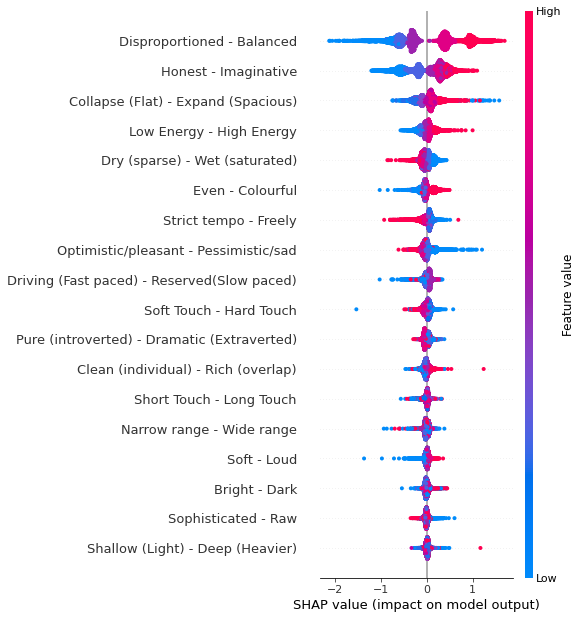

In [87]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [17]:
# load js 
shap.initjs()

'''
KernelExplainer() : KNN, SVM, RandomForest, GBM, H2O 
TreeExplainer() : tree-based machine learning model (faster) 
DeepExplainer() : deep learning model 
'''

explainer = shap.TreeExplainer(model)


In [28]:
import glob
import os

In [60]:
input_folder = 'shap_v6'


In [61]:
output_folder = 'shap_value_v6'

os.makedirs(output_folder, exist_ok=True)

csv_files = glob.glob(os.path.join(input_folder, 'shap_*.csv'))

for file in csv_files:
    # 파일 이름만 추출 (예: shap_53.csv)
    filename = os.path.basename(file)
    
    # CSV 파일 읽기
    df = pd.read_csv(file)
    filtered_df = df.iloc[:, 1:19]  # 두 번째 열부터 18번째 열까지 사용
    
    # SHAP 값 계산
    shap_values = explainer.shap_values(filtered_df)
    
    # SHAP 값을 DataFrame으로 변환
    shap_df = pd.DataFrame(shap_values)
    
    # 결과 저장
    output_path = os.path.join(output_folder, filename)
    shap_df.to_csv(output_path, index=False)

    print(f"Processed: {filename} → {output_path}")

Processed: shap_84.csv → shap_value_v6/shap_84.csv
Processed: shap_68.csv → shap_value_v6/shap_68.csv
Processed: shap_67.csv → shap_value_v6/shap_67.csv
Processed: shap_65.csv → shap_value_v6/shap_65.csv
Processed: shap_80.csv → shap_value_v6/shap_80.csv
Processed: shap_61.csv → shap_value_v6/shap_61.csv
Processed: shap_77.csv → shap_value_v6/shap_77.csv
Processed: shap_20.csv → shap_value_v6/shap_20.csv
Processed: shap_72.csv → shap_value_v6/shap_72.csv
Processed: shap_83.csv → shap_value_v6/shap_83.csv
Processed: shap_82.csv → shap_value_v6/shap_82.csv
Processed: shap_76.csv → shap_value_v6/shap_76.csv
Processed: shap_85.csv → shap_value_v6/shap_85.csv
Processed: shap_73.csv → shap_value_v6/shap_73.csv
Processed: shap_66.csv → shap_value_v6/shap_66.csv
Processed: shap_75.csv → shap_value_v6/shap_75.csv
Processed: shap_78.csv → shap_value_v6/shap_78.csv
Processed: shap_70.csv → shap_value_v6/shap_70.csv
Processed: shap_64.csv → shap_value_v6/shap_64.csv
Processed: shap_71.csv → shap_v

In [62]:
output_folder = 'overallscore_v6'

os.makedirs(output_folder, exist_ok=True)

csv_files = glob.glob(os.path.join(input_folder, 'shap_*.csv'))

for file in csv_files:
    # 파일 이름만 추출 (예: shap_53.csv)
    filename = os.path.basename(file)
    
    # CSV 파일 읽기
    df = pd.read_csv(file)
    filtered_df = df.iloc[:, 1:19]  # 두 번째 열부터 18번째 열까지 사용
    
    # output 값 추출
    score = model.predict(filtered_df)
    
    # SHAP 값을 DataFrame으로 변환
    score_df = pd.DataFrame(score)
    
    numeric_values = pd.to_numeric(score_df[0][1:], errors='coerce')
    print(numeric_values.describe())
    
    # 결과 저장
    output_path = os.path.join(output_folder, filename)
    score_df.to_csv(output_path, index=False)

    print(f"Processed: {filename} → {output_path}")

count    305.000000
mean       3.161279
std        0.053820
min        2.804372
25%        3.135561
50%        3.171247
75%        3.190089
max        3.333189
Name: 0, dtype: float64
Processed: shap_84.csv → overallscore_v6/shap_84.csv
count    305.000000
mean       3.154136
std        0.081492
min        2.841637
25%        3.122165
50%        3.184817
75%        3.203660
max        3.406878
Name: 0, dtype: float64
Processed: shap_68.csv → overallscore_v6/shap_68.csv
count    305.000000
mean       3.141930
std        0.087152
min        2.795341
25%        3.100311
50%        3.171247
75%        3.190089
max        3.343951
Name: 0, dtype: float64
Processed: shap_67.csv → overallscore_v6/shap_67.csv
count    305.000000
mean       3.158534
std        0.082775
min        2.908293
25%        3.122165
50%        3.184817
75%        3.203660
max        3.454666
Name: 0, dtype: float64
Processed: shap_65.csv → overallscore_v6/shap_65.csv
count    305.000000
mean       3.150488
std        0

In [69]:
# ✅ pid 목록 정의
pid_list = get_pid_list_from_result_diff()

for pid in pid_list:
    print(f"🔍 Processing PID: {pid}")

    try:
        # 1. improve.csv 로드
        improve_path = f'result/{pid}_improve.csv'
        df = pd.read_csv(improve_path)

        # 2. feature_1 ~ feature_18 컬럼만 선택
        filtered_df = df.iloc[:, 1:19]  # measure 열 제외하고 feature_1 ~ feature_18

        # 3. 모델 예측
        score = model.predict(filtered_df)

        # 4. 결과 저장
        score_df = pd.DataFrame({'score': score})
        score_path = f'result/{pid}_score.csv'
        score_df.to_csv(score_path, index=False)

        print(f"✅ Saved: {score_path}")

    except Exception as e:
        print(f"❌ Failed for PID {pid}: {e}")

🔍 Processing PID: 53
✅ Saved: result/53_score.csv
🔍 Processing PID: 54
✅ Saved: result/54_score.csv
🔍 Processing PID: 55
✅ Saved: result/55_score.csv
🔍 Processing PID: 56
✅ Saved: result/56_score.csv
🔍 Processing PID: 58
✅ Saved: result/58_score.csv
🔍 Processing PID: 59
✅ Saved: result/59_score.csv
🔍 Processing PID: 60
✅ Saved: result/60_score.csv


In [91]:
# ✅ pid 목록 정의
pid_list = get2_pid_list_from_result_diff()

for pid in pid_list:
    print(f"🔍 Processing PID: {pid}")

    try:
        # 1. improve.csv 로드
        improve_path = f'result_b/{pid}_improve.csv'
        df = pd.read_csv(improve_path)

        # 2. feature_1 ~ feature_18 컬럼만 선택
        filtered_df = df.iloc[:, 1:19]  # measure 열 제외하고 feature_1 ~ feature_18

        # 3. 모델 예측
        score = model.predict(filtered_df)

        # 4. 결과 저장
        score_df = pd.DataFrame({'score': score})
        score_path = f'result_b/{pid}_score.csv'
        score_df.to_csv(score_path, index=False)

        print(f"✅ Saved: {score_path}")

    except Exception as e:
        print(f"❌ Failed for PID {pid}: {e}")

🔍 Processing PID: 61
✅ Saved: result_b/61_score.csv
🔍 Processing PID: 63
✅ Saved: result_b/63_score.csv
🔍 Processing PID: 64
✅ Saved: result_b/64_score.csv
🔍 Processing PID: 66
✅ Saved: result_b/66_score.csv
🔍 Processing PID: 68
✅ Saved: result_b/68_score.csv
🔍 Processing PID: 69
✅ Saved: result_b/69_score.csv
🔍 Processing PID: 70
✅ Saved: result_b/70_score.csv
🔍 Processing PID: 71
✅ Saved: result_b/71_score.csv
🔍 Processing PID: 73
✅ Saved: result_b/73_score.csv
🔍 Processing PID: 74
✅ Saved: result_b/74_score.csv
🔍 Processing PID: 75
✅ Saved: result_b/75_score.csv
🔍 Processing PID: 76
✅ Saved: result_b/76_score.csv
🔍 Processing PID: 78
✅ Saved: result_b/78_score.csv
🔍 Processing PID: 79
✅ Saved: result_b/79_score.csv
🔍 Processing PID: 81
✅ Saved: result_b/81_score.csv
🔍 Processing PID: 82
✅ Saved: result_b/82_score.csv
🔍 Processing PID: 83
✅ Saved: result_b/83_score.csv
🔍 Processing PID: 84
✅ Saved: result_b/84_score.csv
🔍 Processing PID: 85
✅ Saved: result_b/85_score.csv


In [90]:
import os
import re

def get2_pid_list_from_result_diff(result_dir='result_b'):
    pid_list = []
    pattern = re.compile(r'^(\d+)_diff\.csv$')  # 패턴: 숫자_pid_diff.csv

    for filename in os.listdir(result_dir):
        match = pattern.match(filename)
        if match:
            pid = int(match.group(1))
            pid_list.append(pid)

    return sorted(pid_list)

In [37]:
import os
import re

def get_pid_list_from_result_diff(result_dir='result'):
    pid_list = []
    pattern = re.compile(r'^(\d+)_diff\.csv$')  # 패턴: 숫자_pid_diff.csv

    for filename in os.listdir(result_dir):
        match = pattern.match(filename)
        if match:
            pid = int(match.group(1))
            pid_list.append(pid)

    return sorted(pid_list)

In [19]:
filtered_df

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    2.793213   3.295661   4.004658   3.793342   3.166731   3.808054   
1    2.868346   3.295887   3.996976   3.566712   3.268675   3.755403   
2    2.884085   3.194210   4.034206   3.616579   3.489520   3.555399   
3    2.927957   3.250452   3.701765   3.837632   3.395670   3.459768   
4    3.254247   3.088798   4.047782   3.924192   3.340493   3.326229   
..        ...        ...        ...        ...        ...        ...   
74   3.152800   3.185629   3.894206   3.439735   3.331841   3.508913   
75   3.194742   3.073574   3.849021   3.549142   3.380926   3.450682   
76   3.181554   3.553583   3.515281   3.245891   3.353464   3.821319   
77   3.140050   3.400010   3.440635   3.268444   3.236112   3.924230   
78   3.698371   3.405302   3.156366   3.067714   3.021864   3.428106   

    feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0    3.781291   3.348633   4.098780    3.744961    3.239383    3.373190   
1    3.912507   3.226175   3.927743    3.719244    3.145398    3.357862   
2    3.879693   3.029906   3.955262    3.774292    3.364040    3.413748   
3    3.824544   3.131422   3.971612    3.571689    3.265054    3.452670   
4    3.752043   3.452886   4.324858    3.822474    3.487504    3.381192   
..        ...        ...        ...         ...         ...         ...   
74   3.938340   3.348610   3.873971    4.000946    3.553686    3.468181   
75   3.796529   3.375411   4.036209    3.976461    3.709252    3.480785   
76   3.780309   3.588917   3.905783    3.656836    3.530624    3.126425   
77   3.697298   3.586960   3.879180    3.531184    3.602544    3.217668   
78   3.692730   3.349214   3.576274    3.313048    3.445578    3.701491   

    feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  
0     3.284962    3.594110    3.290184    3.560442    4.165064    3.421822  
1     3.270350    3.664733    3.206182    3.453075    4.078477    3.154959  
2     3.434765    3.700565    3.433964    3.718963    4.255967    3.008897  
3     3.576264    3.470010    3.426170    3.796449    4.287987    3.112769  
4     3.954430    3.228135    3.175151    3.701928    3.841587    3.170122  
..         ...         ...         ...         ...         ...         ...  
74    3.484161    3.487022    3.409126    3.690275    3.938692    3.144092  
75    3.477530    3.486100    3.515509    3.587129    3.862156    3.047433  
76    3.254382    3.585584    3.264241    3.054301    3.296824    2.902988  
77    3.288297    3.379490    3.429848    3.193153    3.521913    2.785874  
78    2.888436    3.455818    3.336424    3.371133    3.338595    2.382963  

[79 rows x 18 columns]

In [20]:
test = filtered_df


In [22]:
shap_values = explainer.shap_values(test)

In [26]:
shap_df = pd.DataFrame(shap_values)

In [27]:
shap_df

0         1         2         3         4         5         6   \
0   0.021179 -0.026511 -0.030173  0.016818  0.027733 -0.037573 -0.010401   
1   0.033417 -0.018511 -0.037151  0.006375  0.028301 -0.037284 -0.011092   
2   0.020372 -0.026513 -0.030170  0.016183  0.027736 -0.037585 -0.007688   
3   0.052553 -0.026504 -0.045406  0.009131  0.021094  0.026194 -0.003615   
4   0.053452 -0.026619 -0.045448  0.009670  0.021100  0.026037 -0.006346   
..       ...       ...       ...       ...       ...       ...       ...   
74  0.030757 -0.019345 -0.027664  0.011910  0.022556 -0.024191 -0.010767   
75  0.031803 -0.018996 -0.037977  0.022769  0.023075  0.023749 -0.022793   
76  0.052814  0.025124 -0.031051  0.027420  0.040349 -0.014499 -0.013292   
77  0.038431 -0.002105 -0.020009  0.019265  0.031638 -0.022426 -0.014660   
78 -0.026994 -0.032759 -0.022372  0.031402  0.028526  0.031790 -0.012219   

          7         8         9         10        11        12        13  \
0  -0.033143  0.007300 -0.054850 -0.030838 -0.008799 -0.104410 -0.325449   
1  -0.026169  0.005272 -0.051385 -0.030056 -0.010852 -0.101541 -0.329455   
2  -0.033381  0.006362 -0.054838 -0.030821 -0.008754 -0.104632 -0.325475   
3  -0.047933  0.003520 -0.046837 -0.028293 -0.009018  0.083244 -0.633176   
4  -0.047491  0.004431 -0.046844 -0.028348 -0.008978  0.083596 -0.633190   
..       ...       ...       ...       ...       ...       ...       ...   
74 -0.053471  0.002124 -0.045826 -0.002452 -0.008517 -0.123806 -0.626483   
75 -0.034657  0.011854 -0.042794  0.009203 -0.007209 -0.104243 -0.622330   
76 -0.031558  0.017151 -0.051474  0.003544 -0.011123 -0.104275 -0.323334   
77 -0.010424 -0.007794 -0.045498 -0.006723 -0.013441 -0.106205 -0.621044   
78 -0.056144  0.024780  0.052350 -0.011100  0.035475 -0.075235 -0.652886   

          14        15        16        17  
0   0.044146 -0.027827 -0.037532 -0.153489  
1   0.050445  0.016409 -0.035557 -0.176640  
2   0.044240 -0.027830 -0.037514 -0.153511  
3   0.048497 -0.040464 -0.029871 -0.173282  
4   0.048222 -0.040616 -0.029691 -0.173101  
..       ...       ...       ...       ...  
74  0.045384 -0.033541 -0.035141 -0.156276  
75 -0.018024 -0.021968 -0.029339 -0.141370  
76  0.042073  0.006081 -0.105956 -0.192383  
77  0.043368 -0.001776 -0.035767 -0.183311  
78  0.043308 -0.005157 -0.123030 -0.591430  

[79 rows x 18 columns]

In [99]:
shap_df.to_csv('test_shap_values.csv', index=False)

In [23]:
# 첫 번째 데이터에 대한 SHAP 시각화
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test.iloc[0,:])

In [24]:
# Outlier 에 대한 SHAP 시각화 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[259,:], test.iloc[259,:])

IndexError: index 259 is out of bounds for axis 0 with size 79

In [25]:
# 전체 데이터에 대한 SHAP 시각화 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, test)

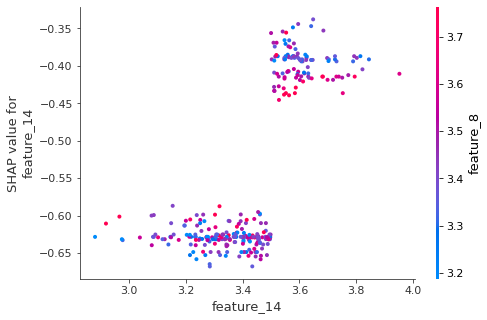

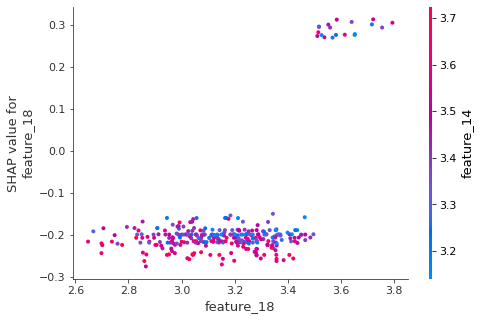

In [91]:
shap.initjs()
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))  # (13, ) : 각각의 Feature 에 대해 shap value 다 더한 것 

# make SHAP plots of the three most important features
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, test) # top_inds에 특정 feature를 넣어 영향력 파악

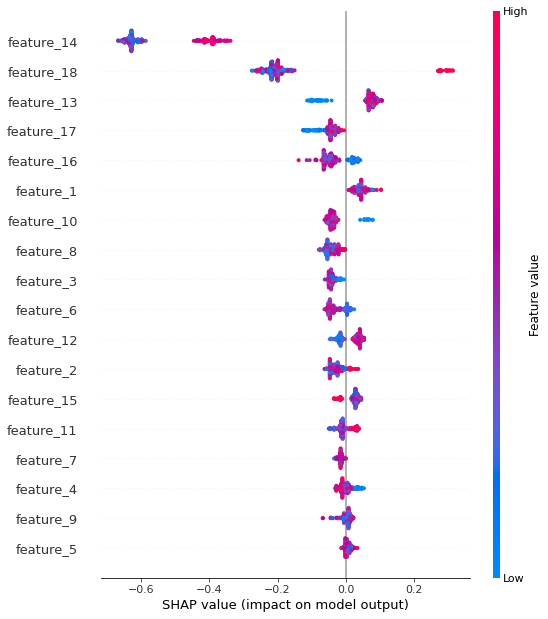

In [92]:
shap.summary_plot(shap_values, test)

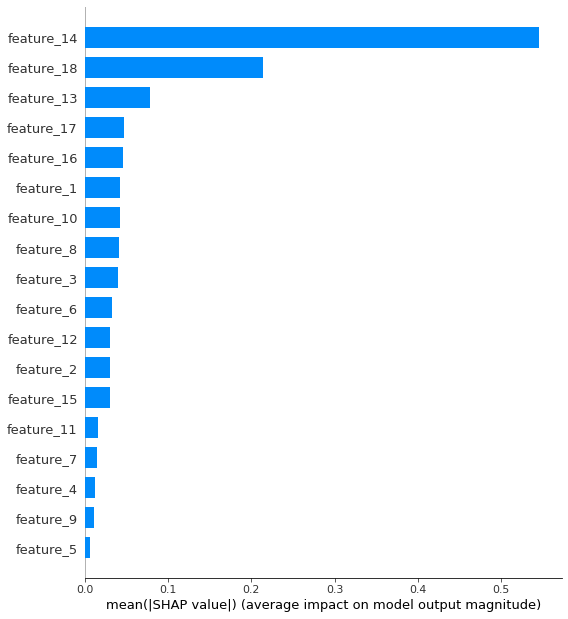

In [93]:
shap.summary_plot(shap_values, test, plot_type='bar')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


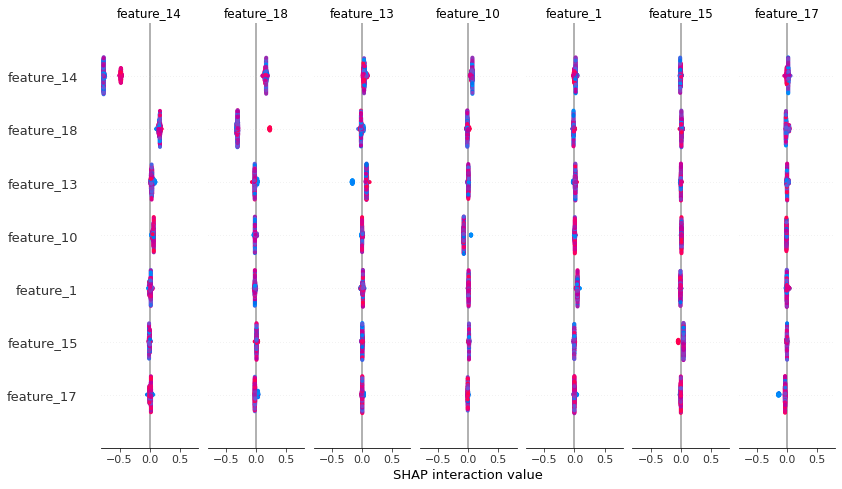

In [94]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(test)

# main effect on the diagonal 
# interact effect off the diagonal 
shap.summary_plot(shap_interaction_values, test)


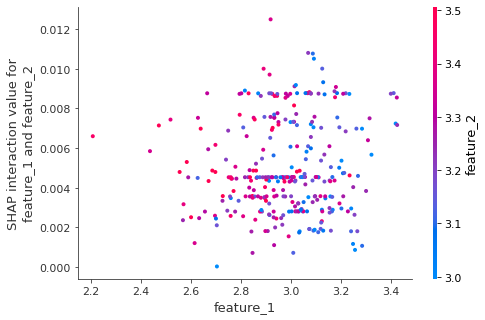

In [95]:
shap.dependence_plot(
    ("feature_1", "feature_2"),
    shap_interaction_values, test,
    display_features=test
)

In [ ]:
Appendix

In [53]:
y_new2 = df['Lack of technique - Great skill'].values

In [54]:
y_new2.size

449

In [55]:
X,y = filtered_df, y_new2

In [56]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

# modeling 
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=20,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
# load js 
shap.initjs()

'''
KernelExplainer() : KNN, SVM, RandomForest, GBM, H2O 
TreeExplainer() : tree-based machine learning model (faster) 
DeepExplainer() : deep learning model 
'''

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [103]:
# 첫 번째 데이터에 대한 SHAP 시각화
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [104]:
# Outlier 에 대한 SHAP 시각화 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[259,:], X_train.iloc[259,:])

In [105]:
# 전체 데이터에 대한 SHAP 시각화 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

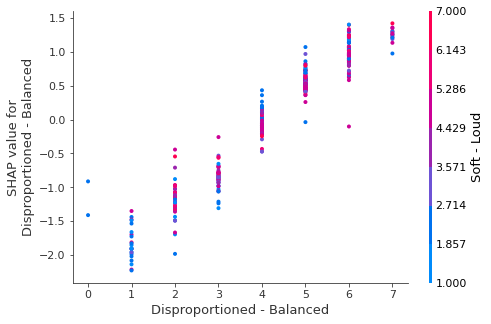

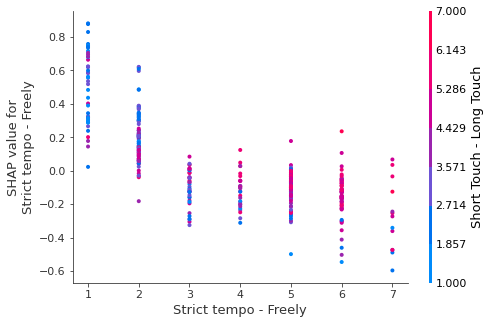

In [61]:
shap.initjs()
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))  # (13, ) : 각각의 Feature 에 대해 shap value 다 더한 것 

# make SHAP plots of the three most important features
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, X_train) # top_inds에 특정 feature를 넣어 영향력 파악

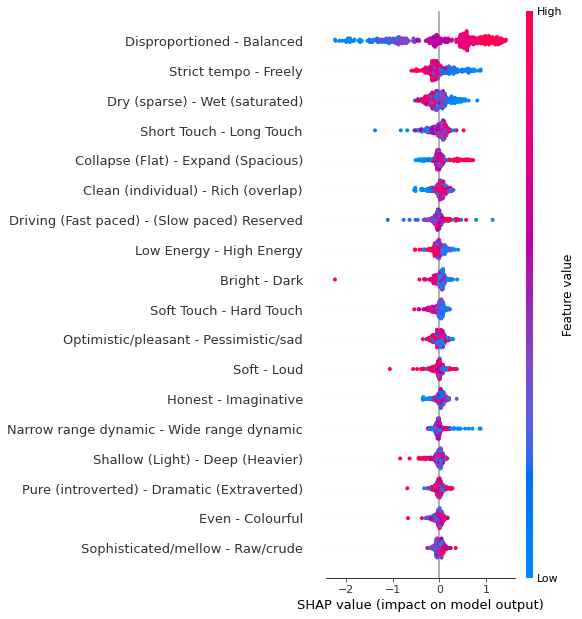

In [62]:
shap.summary_plot(shap_values, X_train)

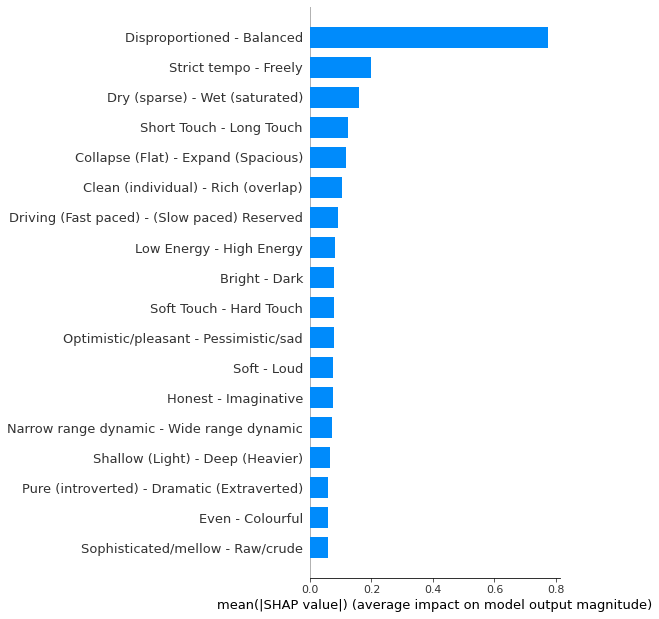

In [63]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


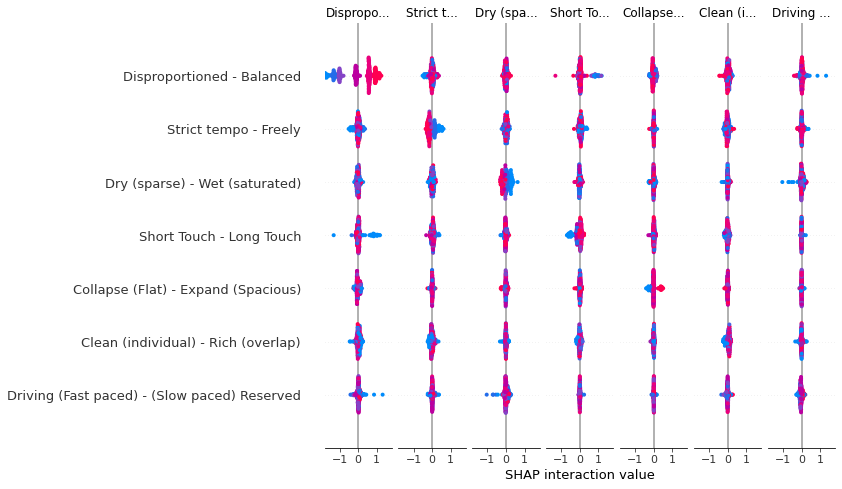

In [64]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_train)

# main effect on the diagonal 
# interact effect off the diagonal 
shap.summary_plot(shap_interaction_values, X_train)


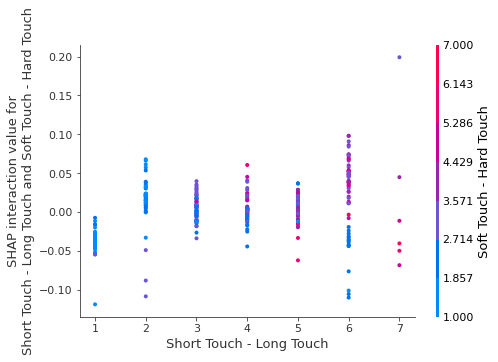

In [65]:
shap.dependence_plot(
    ("Short Touch - Long Touch", "Soft Touch - Hard Touch"),
    shap_interaction_values, X_train,
    display_features=X_train
)

In [86]:
shap_values[3]

array([-0.08580437,  0.02607132, -0.01341199,  0.09160778, -0.07104785,
       -0.08003686,  0.03965493, -0.10949827, -0.05914229, -0.06668217,
        0.01171361,  0.01753955, -0.00795761, -0.1384936 ,  0.02780105,
       -0.06457531,  0.21649598,  0.04929886], dtype=float32)

In [78]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1:10,:], X_train.iloc[1:10,:])